In [81]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import xlsxwriter
import seaborn as sns
#read the file and filled the blank name and adress column
df=pd.read_csv('orders_2020_2021_DataSet_Updated (1).csv')
df['Billing Name'].fillna(method='ffill', inplace=True)
df['Billing Street Address'].fillna(method='ffill', inplace=True)
df[['Billing Street Address','Billing Name']]
df[['payment','st']]=df['Payment Method'].str.split(' ', n=1, expand=True)
df.drop('st',inplace=True, axis=1)
df['adress_diff']=" "

In [82]:
for i in range(0,len(df)):
    if ((df['Billing Street Address'][i]!=df['Shipping Street Address'][i]) and (df['Billing Street Address'][i]!=df['Shipping Street Address 2'][i])):
     if ((df['Billing Street Address 2'][i]!=df['Shipping Street Address'][i]) and (df['Billing Street Address 2'][i]!=df['Shipping Street Address 2'][i])):
         df['adress_diff'][i]="DIFFERENT"
    else:
        df['adress_diff'][i]="SAME"
df_largeordr=pd.DataFrame(df[['Billing Name','LineItem Qty']].groupby(['Billing Name'])['LineItem Qty'].sum())
df_largeordr=df_largeordr[df_largeordr['LineItem Qty']>100].sort_values(by='LineItem Qty',ascending=False)
df_largeordr=df_largeordr.reset_index()

C:\Users\mailm\AppData\Local\Temp/ipykernel_2540/3600321366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adress_diff'][i]="SAME"
C:\Users\mailm\AppData\Local\Temp/ipykernel_2540/3600321366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adress_diff'][i]="DIFFERENT"


In [31]:
dif_adrs.head()

,Billing Name,Billing Street Address,Billing Street Address 2,Shipping Street Address,Shipping Street Address 2,LineItem Name,LineItem Qty
3,Ayush Bachle,Maharashtra chandrapur ghugus,NaN,"Chandrapur, ghugus, indra Nagar, Rajiv colony,",Bachler guest House 2,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,1
4,Ayush Bachle,Maharashtra chandrapur ghugus,NaN,"D-6 SIR SYED APT,FLAT NO 401,THOKAR NO 7,NEAR ...",D-6 SIR SYED APT,Barbie Doll (pink),1
5,Ayush Bachle,Maharashtra chandrapur ghugus,NaN,"HIG - II 195, Co operative Colony, Kalinga Vih...",NaN,Sony MDR-G45LP On-Ear Street Wired Headphone,1
7,Leandro Holzman,Wehntalerstrasse 527,NaN,Room no 9 Goutam Nagar gav devi road,Bhandup w Mumbai,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,1
8,Leandro Holzman,Wehntalerstrasse 527,NaN,NEAR HORTICULTURE COLONY SRINAGAR ROAD,PAURI,QUECHUA Ultra Compact Travel 10 Litre Backpack...,2


In [3]:
#Dataframe for different billing and shipping adress
dif_adrs=df[df['Billing Street Address']!=df['Shipping Street Address']]
dif_adrs=dif_adrs[dif_adrs['Billing Street Address']!=dif_adrs['Shipping Street Address 2']]
dif_adrs=dif_adrs[dif_adrs['Billing Street Address 2']!=dif_adrs['Shipping Street Address']]
dif_adrs=dif_adrs[dif_adrs['Billing Street Address 2']!=dif_adrs['Shipping Street Address 2']]
dif_adrs=dif_adrs[['Billing Name','Billing Street Address', 'Billing Street Address 2','Shipping Street Address',
       'Shipping Street Address 2','LineItem Name','LineItem Qty']]
#Dataframe for international orders
df_int=df[['Shipping Country','Billing Name','LineItem Qty']].groupby(['Shipping Country','Billing Name'])['LineItem Qty'].sum()
df_int=df_int.reset_index().sort_values(by='LineItem Qty',ascending=False)
df_int=df_int[df_int['Shipping Country']!='IND']
#Dataframe for multiple orders with diff payment method
multi_orders= df[['Shipping Street Address','payment','LineItem Qty']].dropna().groupby(['Shipping Street Address','payment'])['LineItem Qty'].sum()
d3=pd.DataFrame(multi_orders).sort_values(by='Shipping Street Address').unstack(level=1).dropna()
d3
d4=d3.stack().reset_index()
#Dataframe for mmultiple orders for same item
dfnw=pd.DataFrame(df[['Billing Name','LineItem SKU','LineItem Qty']].groupby(['Billing Name','LineItem SKU'])['LineItem Qty'].sum())
dfnw=dfnw[dfnw['LineItem Qty']>100].sort_values(by='LineItem Qty',ascending=False)
dfnw=dfnw.reset_index()
dfnw

,Billing Name,LineItem SKU,LineItem Qty
0,Harshal Chaudhari,54,999
1,hotcourses hotcourses,11,999
2,test test,11,999
3,test test,15,999
4,test test,8,999
5,Mahendra KUMAR,46,152
6,Girish Joshi,PL-JIO1,150


In [86]:
#functions for csv & PDF report
def input_1():
 fig=plt.figure(figsize=(16,6))
 df['adress_diff'].value_counts().plot(kind='pie',autopct='%.0f%%',title="Comparison Of Billing And Shipping Adress")
 PDF1=PdfPages("adres_diff.pdf")
 PDF1.savefig(fig,bbox_inches = 'tight')
 dif_adrs.to_csv("C:\\Users\\mailm\\diff_adress.csv",header=True)
 PDF1.close()
def input_2():
 fig=plt.figure(figsize=(16,6))
 sns.barplot(x='Billing Name',y='LineItem Qty',data=dfnw,hue='LineItem SKU')
 plt.title("multiple orders for same item with more than 100 line qty")
 PDF2=PdfPages("mult_orders.pdf")
 PDF2.savefig(fig,bbox_inches = 'tight')
 dfnw.to_csv("C:\\Users\\mailm\\mult_orders.csv",header=True)
 PDF2.close()
 
def input_3():
 fig=plt.figure(figsize=(16,6))
 sns.barplot(x='Billing Name',y='LineItem Qty',data=df_largeordr)
 plt.title("unusually large orers (Lineitem qty>100)")
 PDF3=PdfPages("large_orders.pdf")
 PDF3.savefig(fig,bbox_inches = 'tight')
 df_largeordr.to_csv("C:\\Users\\mailm\\large_orders.csv",header=True)
 PDF3.close()
def input_4():
 fig=plt.figure(figsize=(16,6))
 sns.barplot(data=d4,x='Shipping Street Address',y='LineItem Qty',hue='payment')
 plt.title("multiple orders to same adress with diff payment method")
 PDF4=PdfPages("multi_paymnt.pdf")
 PDF4.savefig(fig,bbox_inches = 'tight')
 PDF4.close()
 d4.to_csv("C:\\Users\\mailm\\orders with diff payment.csv",header=True)
def input_5():
 fig=plt.figure(figsize=(16,6))
 sns.barplot(data=df_int.head(10),x='Shipping Country',y='LineItem Qty')
 plt.title("international orders")
 PDF5=PdfPages("intnl_orders.pdf")
 PDF5.savefig(fig,bbox_inches = 'tight')
 PDF5.close()
 df_int.to_csv("C:\\Users\\mailm\\international_orders.csv",header=True)


 

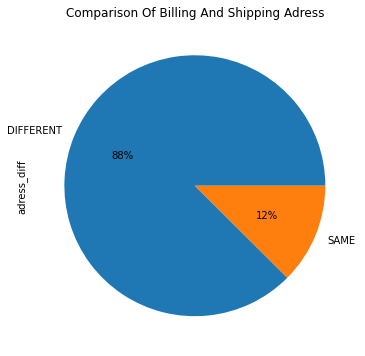

In [87]:
input_1()

                                                       output
user_input                                                   
Enter 1           shipping Adress differs from billing adress
Enter 2                          multiple orders of same item
Enter 3                                unusually large orders
Enter 4     multiple orders to the same item with differen...
Enter 5                       unexpected international orders


enter the number in range 1-5:1


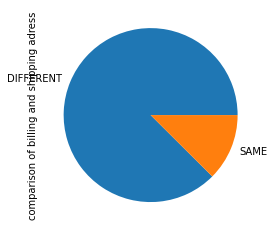

In [44]:
#read user input
data =pd.DataFrame.from_dict({'user_input':  ['Enter 1','Enter 2','Enter 3','Enter 4','Enter 5'],
        'output': ['shipping Adress differs from billing adress','multiple orders of same item','unusually large orders','multiple orders to the same item with different payment method','unexpected international orders']
        }).set_index('user_input')
print(data)
print('\n')
num=int(input("enter the number in range 1-5:"))
if num==1:
 input_1()
elif num==2:
 input_2()
elif num==3:
 input_3()
elif num==4:
 input_4()
elif num==5:
 input_5()